# Classify Wine Quality using scikit-learn

# scikit-learn을 이용한 와인 등급 분류

## Introduction

인공지능은 프로세스를 자동화하고, 비즈니스에 대한 통찰력을 모으고, 프로세스 속도를 높이기 위해 다양한 산업에서 사용되고 있습니다. 인공지능이 실제로 산업에 어떤 영향을 미치는지 실제 시나리오에서 인공지능의 사용을 연구하기 위해 Python을 사용할 것입니다.

와인 등급 분류는 와인 산업에서는 매우 중요한 문제입니다. 와인 양조장에서는 다양한 데이터를 지속적으로 모니터링하면서 그 등급을 관리하고 있습니다. 비록 우리가 와인 생산자는 아니지만, 만일 우리에게 와인 자료가 주어진다면 그 와인이 상급인지(구입할 것인지) 아니면 하급인지(구입하지 않을 것인지)를 판단하는데 도움을 줄 수 있을 것입니다. 실제로 이런 방법으로 와인을 구매하지는 않지만, 머신러닝의 지도학습 중에서 분류 방법을 공부하는데 도움이 될 수 있습니다. 


이 노트북에서는 scikit-learn을 사용한 다양한 머신러닝 알고리즘을 사용한 와인 등급 분류에 관하여 학습합니다.


## Context

우리는 [Kaggle](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)에서 얻은 레드와인 데이터로 실습할 것입니다. Kaggle은 데이터 전문가들이 모여 지식을 공유하고 서로 경쟁하여 보상을 받을 수 있는 데이터 공유 플랫폼입니다. 학습의 편의를 위해 위 사이트에서 다운로드 받은 데이터가 '[Dataset]\_Module11\_(redWine).csv'로 제공됩니다.

# 0. 필요한 패키지 설치

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# 1. 데이터 불러오기

## Use Python to open csv files

Pandas는 데이터 과학을 위한 인기 있는 Python 라이브러리입니다. 강력하고 유연한 데이터 구조를 제공하여 데이터 조작 및 분석을 더 쉽게 만듭니다.

## Read the CSV file

In [2]:
wine_data = pd.read_csv(r'[Dataset]_Module11_(redWine).csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. 데이터 탐색

#데이터 개수 
-> df.info() -> 1599개

12개의 columns 
-> 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      
 2   citric acid           
 3   residual sugar        
 4   chlorides             
 5   free sulfur dioxide   
 6   total sulfur dioxide  
 7   density               
 8   pH                    
 9   sulphates             
 10  alcohol               
 11  quality               

In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 등급별 개수 조사

In [4]:
n_equal = wine_data['quality'].value_counts() # number of each quality class
print(n_equal)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [6]:
# 데이터집합의 통계적 특성 조회
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 3. 데이터 준비와 분할

## 데이터 변환
 -> 3~8 등급의 와인 품질을 상급과 하급의 2진 분류 문제로 변환

In [7]:
# 와인 품질 5 초과 상급, 5이하 하급으로 변경 (2진 분류)
# quality 6,7,8 -> grade 1.0 , quality 3,4,5 -> grade 0.0 
y=pd.Series([1.0 if v_equal>5 else 0.0 for v_equal in wine_data['quality']])
# label로 사용

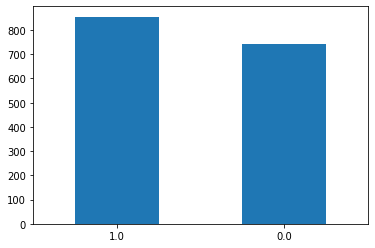

In [10]:
# y값의 0과 1의 분포 확인
y.value_counts().plot.bar(rot=0)

In [11]:
# feature data
X = wine_data.drop(['quality'], axis=1)

## 데이터 분할

In [12]:
# 데이터를 학습용과 시험용으로 분할
X_train, X_test, y_train, y_test = train_test_split(
    StandardScaler().fit_transform(X), y, random_state=1)

# 4. 분류기 모델 생성, 평가

## 4.1 로지스틱 회귀 (Logistic Regression)

로지스틱 회귀는 명칭에 "회귀"라는 단어가 포함되어 있지만 실제로는 "분류" 알고리듬임

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.76      0.74       188
         1.0       0.78      0.75      0.76       212

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



In [15]:
# 몇개의 데이터에 대한 예측
print(list(y_test[:10]))
print("-------------------------------------------------------")
print(list(lr.predict(X_test[:10])))

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]
-------------------------------------------------------
[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0]


In [16]:
# 몇 개의 데이터에 대한 확률 예측
lr.predict_proba(X_test[:10])

array([[0.50062528, 0.49937472],
       [0.67487698, 0.32512302],
       [0.1425699 , 0.8574301 ],
       [0.38910399, 0.61089601],
       [0.03116155, 0.96883845],
       [0.18574101, 0.81425899],
       [0.1335988 , 0.8664012 ],
       [0.84993808, 0.15006192],
       [0.21983017, 0.78016983],
       [0.67216921, 0.32783079]])

### 4.2 k-최근접 이웃 (k-Nearest Neighbors, KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       188
         1.0       0.72      0.72      0.72       212

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.70      0.71       400



## 4.3 결정 트리 (Decision Tree)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       188
         1.0       0.78      0.75      0.76       212

    accuracy                           0.76       400
   macro avg       0.75      0.76      0.75       400
weighted avg       0.76      0.76      0.76       400



## 4.4 랜덤 포레스트 (Random Forest)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       188
         1.0       0.85      0.80      0.82       212

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



## 4.5 XGBoost (eXtreme Gradient Boosting)

In [24]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier()

In [25]:
y_pred = xgbc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.78      0.76       188
         1.0       0.80      0.75      0.77       212

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



## 4.6 다층 퍼셉트론 (Multi-Layer Perceptron)

In [26]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [27]:
y_pred = mlpc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74       188
         1.0       0.78      0.72      0.75       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



# 5. 더 좋은 모델 찾기

## 결정 트리 사례

In [28]:
# 현재 사용중인 매개변수 확인
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
# 교차 검증 기능으로 wrap하여 훈련시킴
dtr = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=dict(criterion=['gini', 'entropy'],
                             max_depth=[2,4,6,8,10,12]), 
    n_iter=10, cv=3, 
    verbose=2, random_state=42, n_jobs=-1)
dtr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12]},
                   random_state=42, verbose=2)

In [30]:
y_pred = dtr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.65      0.78      0.71       188
         1.0       0.76      0.63      0.69       212

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.71      0.70      0.70       400



# 6. 모델 설명

## 로지스틱 회귀 사례

                 feature      coef
0          fixed acidity  0.350648
1       volatile acidity -0.582278
2            citric acid -0.268945
3         residual sugar  0.113837
4              chlorides -0.122025
5    free sulfur dioxide  0.215061
6   total sulfur dioxide -0.558738
7                density -0.188073
8                     pH  0.017812
9              sulphates  0.433090
10               alcohol  0.867249


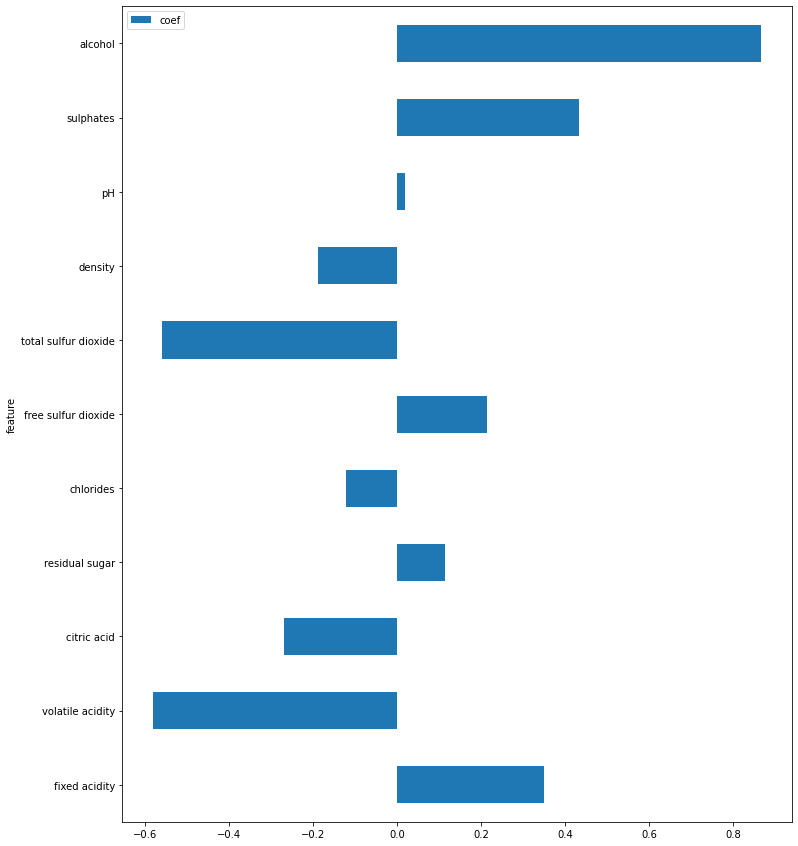

In [31]:
lr_exp = pd.DataFrame({'feature': X.columns.tolist(), 'coef': lr.coef_[0]})
print(lr_exp)
lr_exp.plot(kind='barh', x='feature', y='coef', figsize=(12, 15))

이 결과가 4.3에서 생성한 모델에 비해 더 나은 결과를 산출했나요? 제3주차 강의에서 학습한 FLAML을 사용한 경우과 비교할 경우는 어떠한가요?

## 결정 트리 사례

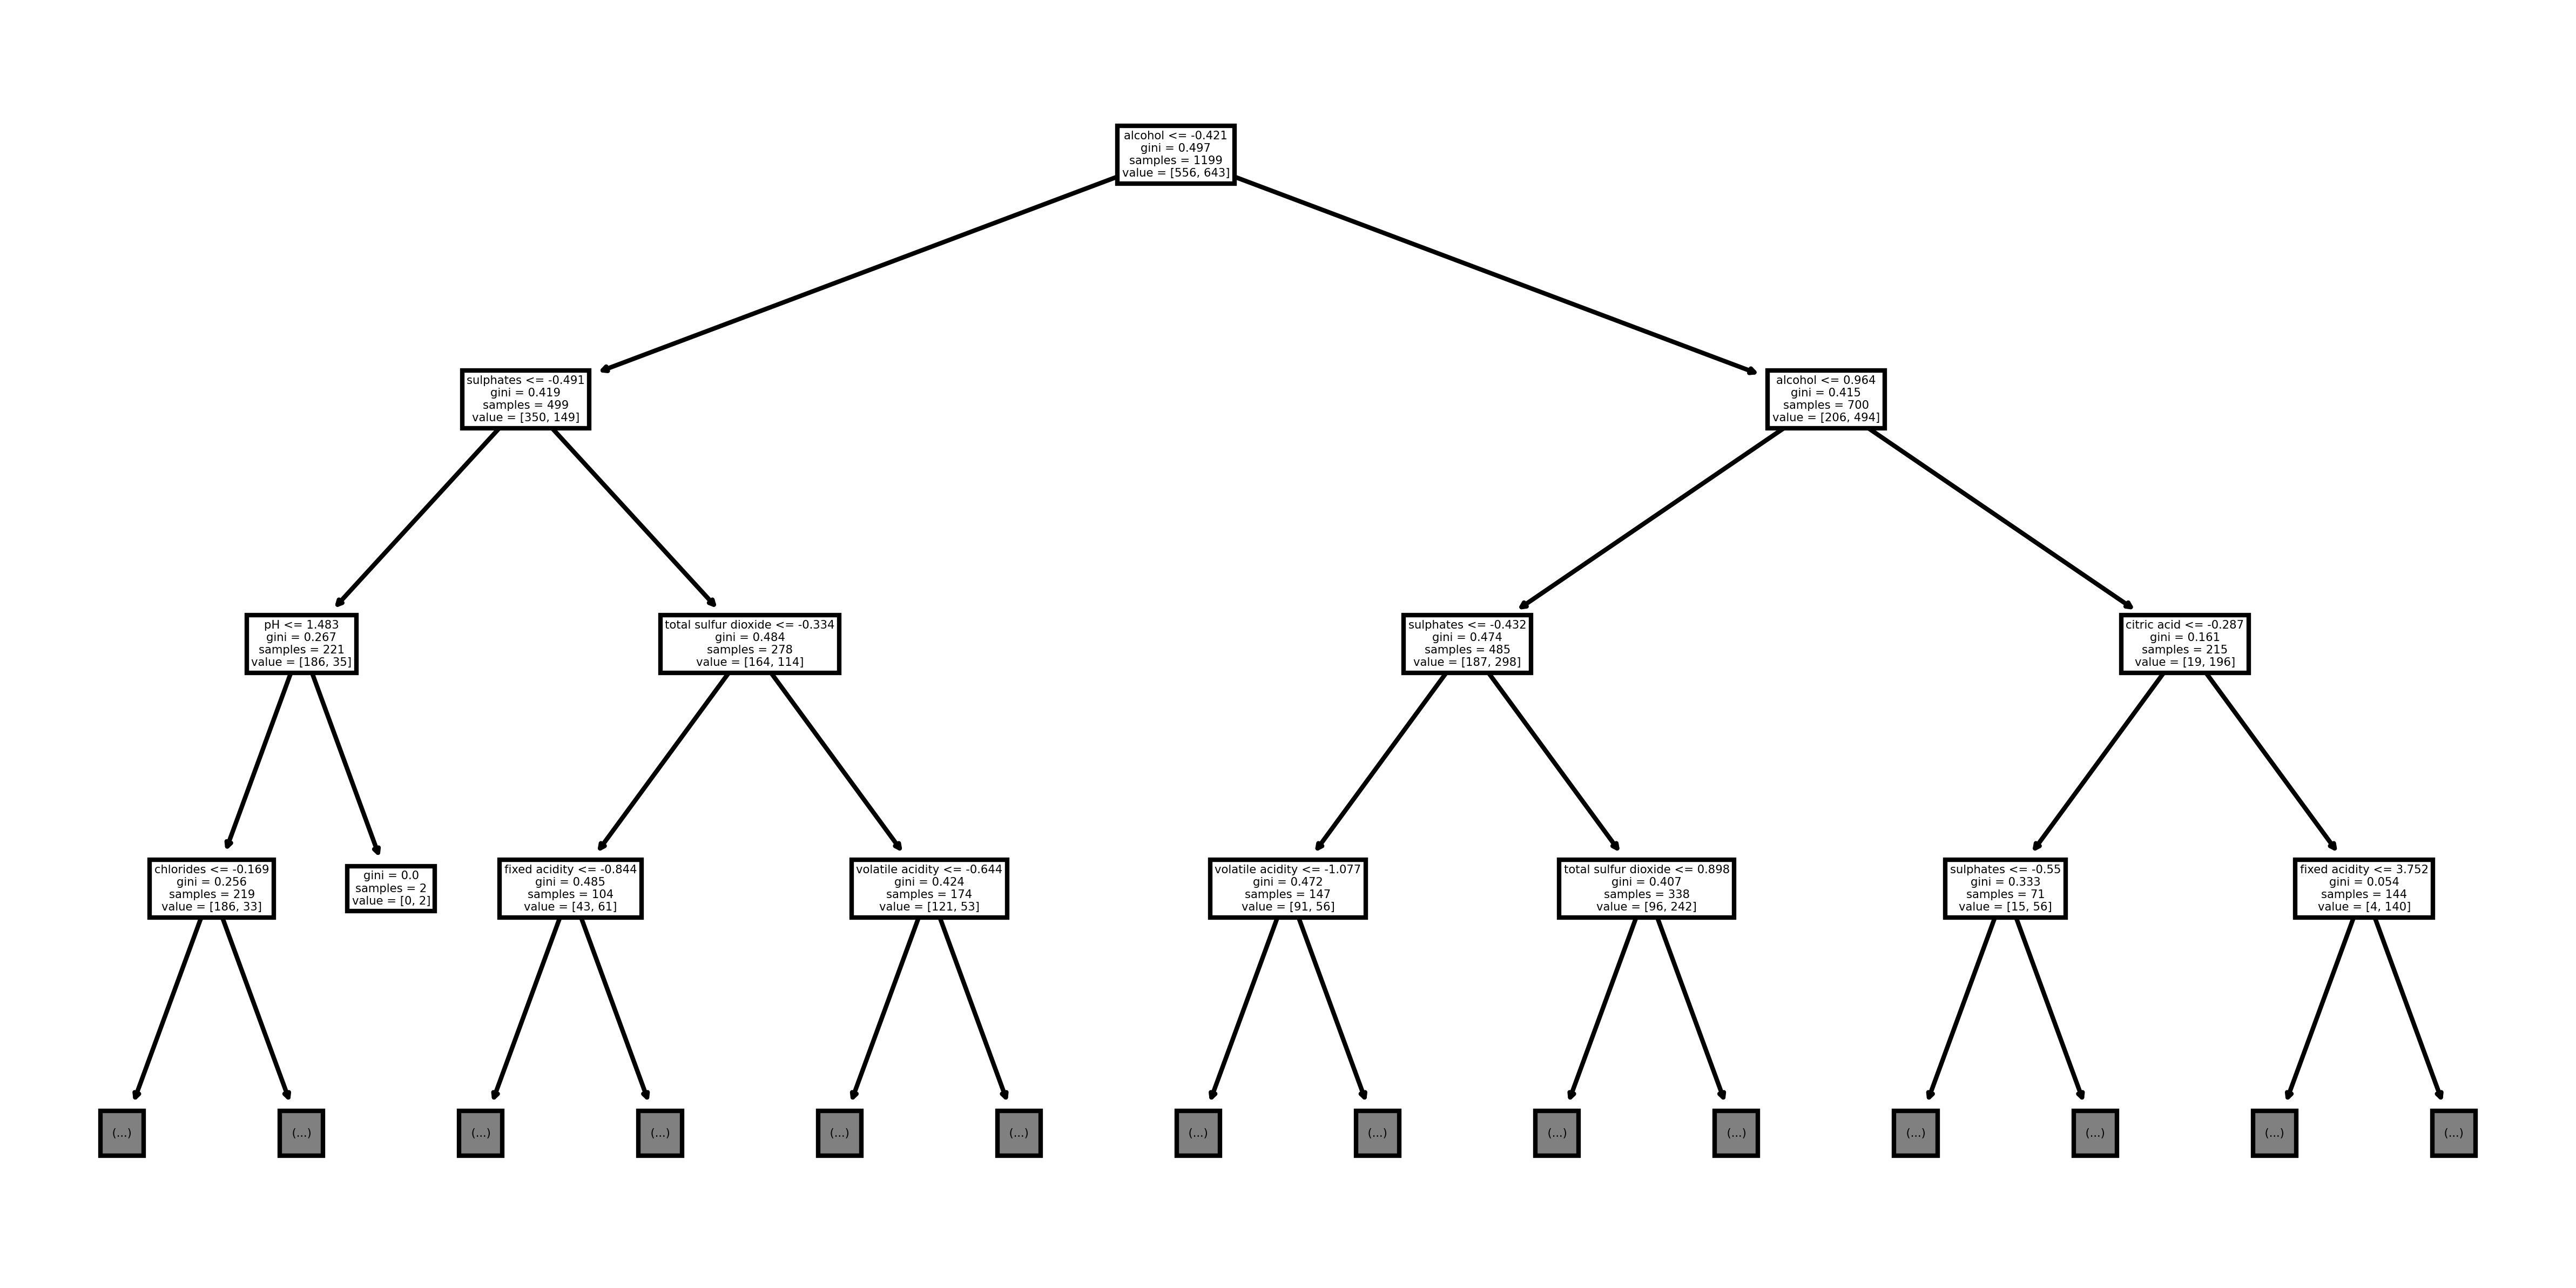

In [32]:
from sklearn import tree
plt.figure(figsize=(10, 5), dpi=600)
_ = tree.plot_tree(dtc, feature_names=X.columns.tolist(), max_depth=3, filled=None)

## 결론

인공 지능은 다양한 현대 사회의 문제를 해결하는데 널리 사용되고 있습니다. 분류는 인공지능에서 다루는 대표적인 지도학습 문제 유형입니다. 이 실험에서는 분류 문제의 사례인 와인 등급 분류에 인공 지능을 사용하는 방법의 
예를 보았습니다. 같은 목적으로 다른 모델을 사용할 수도 있습니다.


Scikit-Learn은 분류 문제를 위한 다양한 머신러닝 알고리듬을 제공합니다. 각 알고리듬은 각기 다른 방법으로 학습하지만 Scikit-Learn은 모든 학습에 "fit", 예측에 "predict" 메서드를 사용하는 것과 같은 방법으로 단일화된 인터페이스를 제공합니다. 그 결과 새로운 알고리듬을 학습하더라도 프로그래밍 스타일은 기존과 동일한 스타일을 유지할 수 있습니다.

Scikit-Learn 수준의 머신러닝 프로그래밍은 FLAML이나 AutoKeras과 같은 AutoML 기능을 사용할 때와는 달리 어떤 알고리듬을 사용할지 직접 결정해야 하고, 선택된 알고리듬을 위한 최적 하이퍼매개변수도 직접 결정하거나 교차검증과 같은 방법으로 직접 찾아야 합니다. 그러나 경험 많은 개발자가 많은 노력을 투입하면 AutoML을 사용할 때보다 적은 시간에 더 정교하게 최적화된 모델을 얻을 수 있는 가능성도 있습니다.

머신러닝 모델에 대한 설명 기능은 사용된 알고리듬의 종류에 따라 다양한 방법으로 조회하여야 하며, 그 결과의 형태도 균일하지 않습니다. 모델을 블랙박스로 간주하고 그 모델의 기능을 모방하는 대리모델을 사용하여 알고리듬에 종속되지 않은 방법으로 모델이나 예측을 설명하는 방법도 있습니다.